- Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn import preprocessing
from scipy import stats
from scipy.stats import ttest_ind

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures



In [24]:
df = pd.read_excel('Housing_data.xlsx')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


In [25]:
df1 = df.to_numpy()
df1

array([[  632,  1800,  2310, ..., 39690,   498,  2400],
       [ 2731,     0,  7070, ..., 39690,   914,  2160],
       [ 2729,     0,  7070, ..., 39283,   403,  3470],
       ...,
       [ 6076,     0, 11930, ..., 39690,   564,  2390],
       [10959,     0, 11930, ..., 39345,   648,  2200],
       [ 4741,     0, 11930, ..., 39690,   788,  1190]], dtype=int64)

In [26]:
df1

array([[  632,  1800,  2310, ..., 39690,   498,  2400],
       [ 2731,     0,  7070, ..., 39690,   914,  2160],
       [ 2729,     0,  7070, ..., 39283,   403,  3470],
       ...,
       [ 6076,     0, 11930, ..., 39690,   564,  2390],
       [10959,     0, 11930, ..., 39345,   648,  2200],
       [ 4741,     0, 11930, ..., 39690,   788,  1190]], dtype=int64)

In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
df.columns = ['Crime Rate', 'Residential Zone', 'Non Retail bsn', 'Dummy Var', 'Nitric Ox Concetration', 'Room Average', 'Owners', 'Dist Boston Jobs', 'Index Highways Distance', 'Tax rate', 'School Ratio', 'Blacks Average', 'Perc Status Popul', 'Median Value Homes']
df.columns

Index(['Crime Rate', 'Residential Zone', 'Non Retail bsn', 'Dummy Var',
       'Nitric Ox Concetration', 'Room Average', 'Owners', 'Dist Boston Jobs',
       'Index Highways Distance', 'Tax rate', 'School Ratio', 'Blacks Average',
       'Perc Status Popul', 'Median Value Homes'],
      dtype='object')

In [29]:
df

,Crime Rate,Residential Zone,Non Retail bsn,Dummy Var,Nitric Ox Concetration,Room Average,Owners,Dist Boston Jobs,Index Highways Distance,Tax rate,School Ratio,Blacks Average,Perc Status Popul,Median Value Homes
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


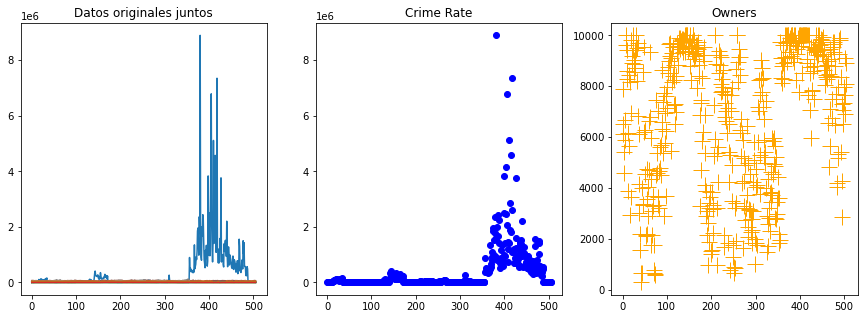

In [30]:
fig = plt.figure(figsize =(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_title('Datos originales juntos')
ax1.plot(df)
ax2.set_title("Crime Rate")
ax2.plot(df["Crime Rate"], linewidth=0, marker='o', color='blue', markersize=6)
ax3.set_title("Owners")
ax3.plot(df["Owners"], linewidth=0, marker='+', color='orange', markersize=16)
plt.show()

Escala en función de Mínimo y Máximo

In [31]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(df)
datos_min_max

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

Normalización de Datos

In [32]:
datos_normalizer = preprocessing.Normalizer().transform(df.T)
datos_normalizer = datos_normalizer.T
datos_normalizer

array([[3.01395767e-05, 3.08684289e-02, 7.85307229e-03, ...,
        4.79270479e-02, 1.52411958e-02, 4.38451184e-02],
       [1.30239215e-04, 0.00000000e+00, 2.40351606e-02, ...,
        4.79270479e-02, 2.79727972e-02, 3.94606065e-02],
       [1.30143837e-04, 0.00000000e+00, 2.40351606e-02, ...,
        4.74355813e-02, 1.23337388e-02, 6.33927337e-02],
       ...,
       [2.89759602e-04, 0.00000000e+00, 4.05572088e-02, ...,
        4.79270479e-02, 1.72611133e-02, 4.36624304e-02],
       [5.22625983e-04, 0.00000000e+00, 4.05572088e-02, ...,
        4.75104484e-02, 1.98319175e-02, 4.01913585e-02],
       [2.26094515e-04, 0.00000000e+00, 4.05572088e-02, ...,
        4.79270479e-02, 2.41165910e-02, 2.17398712e-02]])

Estandarización de Datos (desv_std = 1, media = 0)

In [33]:
datos_standard_scaler = preprocessing.StandardScaler().fit_transform(df)
# estandarizado = (X - media) / std

datos_robust_scaler = preprocessing.RobustScaler().fit_transform(df)

# estandarizado = (X - rango_intercuartílico) / std 

datos_standard_scaler, datos_robust_scaler

(array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
         -1.0755623 ,  0.15968566],
        [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
         -0.49243937, -0.10152429],
        [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
         -1.2087274 ,  1.32424667],
        ...,
        [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
         -0.98304761,  0.14880191],
        [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
         -0.86530163, -0.0579893 ],
        [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
         -0.66905833, -1.15724782]]),
 array([[-0.06959315,  1.44      , -0.57164988, ...,  0.26190191,
         -0.63768116,  0.35109718],
        [-0.06375455,  0.        , -0.20294345, ...,  0.26190191,
         -0.22188906,  0.05015674],
        [-0.06376011,  0.        , -0.20294345, ...,  0.06667466,
         -0.73263368,  1.69278997],
        ...,
        [-0.05445006,  0.        ,  0.17350891, ...,  

Creamos la columna Dummy basándonos en los de la columna 'Index Highways Distance'

In [34]:
df['Index Highways Distance'].values

array([ 1,  2,  2,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
        4,  4,  4,  3,  5,  2,  5,  8,  8,  8,  8,  8,  8,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  3,
        3,  3,  3,  2,  2,  2,  2,  4,  4,  4,  2,  2,  2,  2,  2,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  3,  3,  3,  3,  3,  3,  3,  3,
        5,  5,  5,  5,  5,  5,  1,  1,  4,  2,  2,  2,  3,  3,  2,  2,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  8,
        8,  8,  8,  8,  8

In [35]:
columna_dummies = pd.get_dummies(df['Index Highways Distance'])
print(columna_dummies)

     1   2   3   4   5   6   7   8   24
0     1   0   0   0   0   0   0   0   0
1     0   1   0   0   0   0   0   0   0
2     0   1   0   0   0   0   0   0   0
3     0   0   1   0   0   0   0   0   0
4     0   0   1   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..
501   1   0   0   0   0   0   0   0   0
502   1   0   0   0   0   0   0   0   0
503   1   0   0   0   0   0   0   0   0
504   1   0   0   0   0   0   0   0   0
505   1   0   0   0   0   0   0   0   0

[506 rows x 9 columns]


In [36]:
df_dummies = pd.get_dummies(df, columns=['Index Highways Distance'])
print(df.head)
print(df_dummies.head())

<bound method NDFrame.head of      Crime Rate  Residential Zone  Non Retail bsn  Dummy Var  \
0           632              1800            2310          0   
1          2731                 0            7070          0   
2          2729                 0            7070          0   
3          3237                 0            2180          0   
4          6905                 0            2180          0   
..          ...               ...             ...        ...   
501        6263                 0           11930          0   
502        4527                 0           11930          0   
503        6076                 0           11930          0   
504       10959                 0           11930          0   
505        4741                 0           11930          0   

     Nitric Ox Concetration  Room Average  Owners  Dist Boston Jobs  \
0                      5380         65750    6520             40900   
1                      4690         64210    7890          

In [37]:
#print(df_dummies.head())
df_dummies.head(8)

,Crime Rate,Residential Zone,Non Retail bsn,Dummy Var,Nitric Ox Concetration,Room Average,Owners,Dist Boston Jobs,Tax rate,School Ratio,...,Median Value Homes,Index Highways Distance_1,Index Highways Distance_2,Index Highways Distance_3,Index Highways Distance_4,Index Highways Distance_5,Index Highways Distance_6,Index Highways Distance_7,Index Highways Distance_8,Index Highways Distance_24
0,632,1800,2310,0,5380,65750,6520,40900,2960,1530,...,2400,1,0,0,0,0,0,0,0,0
1,2731,0,7070,0,4690,64210,7890,49671,2420,1780,...,2160,0,1,0,0,0,0,0,0,0
2,2729,0,7070,0,4690,71850,6110,49671,2420,1780,...,3470,0,1,0,0,0,0,0,0,0
3,3237,0,2180,0,4580,69980,4580,60622,2220,1870,...,3340,0,0,1,0,0,0,0,0,0
4,6905,0,2180,0,4580,71470,5420,60622,2220,1870,...,3620,0,0,1,0,0,0,0,0,0
5,2985,0,2180,0,4580,64300,5870,60622,2220,1870,...,2870,0,0,1,0,0,0,0,0,0
6,8829,1250,7870,0,5240,60120,6660,55605,3110,1520,...,2290,0,0,0,0,1,0,0,0,0
7,14455,1250,7870,0,5240,61720,9610,59505,3110,1520,...,2710,0,0,0,0,1,0,0,0,0


In [47]:
df_dummies_grafico = df_dummies[['Crime Rate', 'Index Highways Distance_1', 'Index Highways Distance_2','Index Highways Distance_5','Index Highways Distance_6', 'Index Highways Distance_5','Index Highways Distance_6', 'Index Highways Distance_7', 'Index Highways Distance_8', 'Index Highways Distance_24']]
df_dummies_grafico

,Crime Rate,Index Highways Distance_1,Index Highways Distance_2,Index Highways Distance_5,Index Highways Distance_6,Index Highways Distance_5,Index Highways Distance_6,Index Highways Distance_7,Index Highways Distance_8,Index Highways Distance_24
0,632,1,0,0,0,0,0,0,0,0
1,2731,0,1,0,0,0,0,0,0,0
2,2729,0,1,0,0,0,0,0,0,0
3,3237,0,0,0,0,0,0,0,0,0
4,6905,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
501,6263,1,0,0,0,0,0,0,0,0
502,4527,1,0,0,0,0,0,0,0,0
503,6076,1,0,0,0,0,0,0,0,0
504,10959,1,0,0,0,0,0,0,0,0


- Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica


In [53]:
df_dummies_grafico.describe()

,Crime Rate,Index Highways Distance_1,Index Highways Distance_2,Index Highways Distance_5,Index Highways Distance_6,Index Highways Distance_5,Index Highways Distance_6,Index Highways Distance_7,Index Highways Distance_8,Index Highways Distance_24
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524e+05,0.039526,0.047431,0.227273,0.051383,0.227273,0.051383,0.033597,0.047431,0.260870
std,8.601545e+05,0.195035,0.212769,0.419485,0.220997,0.419485,0.220997,0.180367,0.212769,0.439543
min,6.320000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.204500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.565100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.677082e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.897620e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

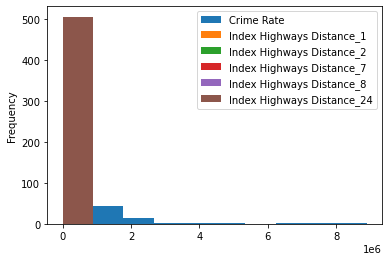

In [52]:
df_dummies_grafico.plot(kind='hist')

<AxesSubplot:>

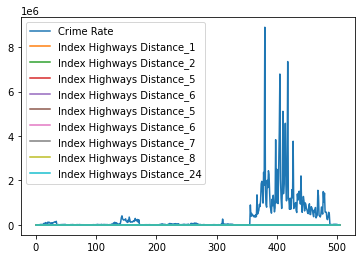

In [48]:
df_dummies_grafico.plot()

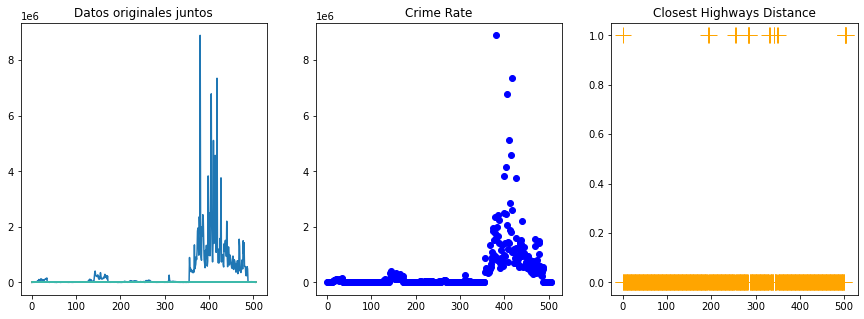

In [49]:
fig = plt.figure(figsize =(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_title('Datos originales juntos')
ax1.plot(df_dummies_grafico)
ax2.set_title("Crime Rate")
ax2.plot(df_dummies_grafico["Crime Rate"], linewidth=0, marker='o', color='blue', markersize=6)
ax3.set_title("Closest Highways Distance")
ax3.plot(df_dummies_grafico["Index Highways Distance_1"], linewidth=0, marker='+', color='orange', markersize=16)
plt.show()